In [3]:
#!pip install scikit-learn
# !pip install matplotlib

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('data/pima-indians-diabetes.csv')
pima.columns = col_names

In [20]:
pima

pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0           6      148  72    35        0  33.6     0.627   50      1
1           1       85  66    29        0  26.6     0.351   31      0
2           8      183  64     0        0  23.3     0.672   32      1
3           1       89  66    23       94  28.1     0.167   21      0
4           0      137  40    35      168  43.1     2.288   33      1
..        ...      ...  ..   ...      ...   ...       ...  ...    ...
763        10      101  76    48      180  32.9     0.171   63      0
764         2      122  70    27        0  36.8     0.340   27      0
765         5      121  72    23      112  26.2     0.245   30      0
766         1      126  60     0        0  30.1     0.349   47      1
767         1       93  70    31        0  30.4     0.315   23      0

[768 rows x 9 columns]

In [8]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [9]:
# Split dataset into training set and test set (70% training and 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

In [11]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [12]:
#Predict the response for test dataset
y_pred = pd.DataFrame(clf.predict(X_test))

In [13]:
# Matriz de confusão
# Linha: Real
# Coluna: Predito
print(confusion_matrix(y_test, y_pred))

[[116  35]
 [ 31  49]]


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       151
           1       0.58      0.61      0.60        80

    accuracy                           0.71       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.71      0.72       231



In [16]:
# Visualização da árvore gerada.
from sklearn import tree

In [17]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (50,50), dpi=300)
tree.plot_tree(clf, filled=True)
fig.savefig('tree_sklearn.png')

[Text(0.4342374213836478, 0.9642857142857143, 'x[4] <= 123.5\ngini = 0.455\nsamples = 537\nvalue = [349, 188]'),
 Text(0.21297169811320754, 0.8928571428571429, 'x[3] <= 28.5\ngini = 0.268\nsamples = 301\nvalue = [253, 48]'),
 Text(0.10062893081761007, 0.8214285714285714, 'x[2] <= 45.4\ngini = 0.135\nsamples = 178\nvalue = [165, 13]'),
 Text(0.08050314465408805, 0.75, 'x[0] <= 7.0\ngini = 0.118\nsamples = 175\nvalue = [164, 11]'),
 Text(0.07044025157232704, 0.6785714285714286, 'x[2] <= 31.4\ngini = 0.108\nsamples = 174\nvalue = [164, 10]'),
 Text(0.02012578616352201, 0.6071428571428571, 'x[6] <= 0.672\ngini = 0.019\nsamples = 102\nvalue = [101, 1]'),
 Text(0.010062893081761006, 0.5357142857142857, 'gini = 0.0\nsamples = 90\nvalue = [90, 0]'),
 Text(0.03018867924528302, 0.5357142857142857, 'x[0] <= 2.5\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.02012578616352201, 0.4642857142857143, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.04025157232704402, 0.4642857142857143, 

[[116  35]
 [ 39  41]]
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       151
           1       0.54      0.51      0.53        80

    accuracy                           0.68       231
   macro avg       0.64      0.64      0.64       231
weighted avg       0.68      0.68      0.68       231



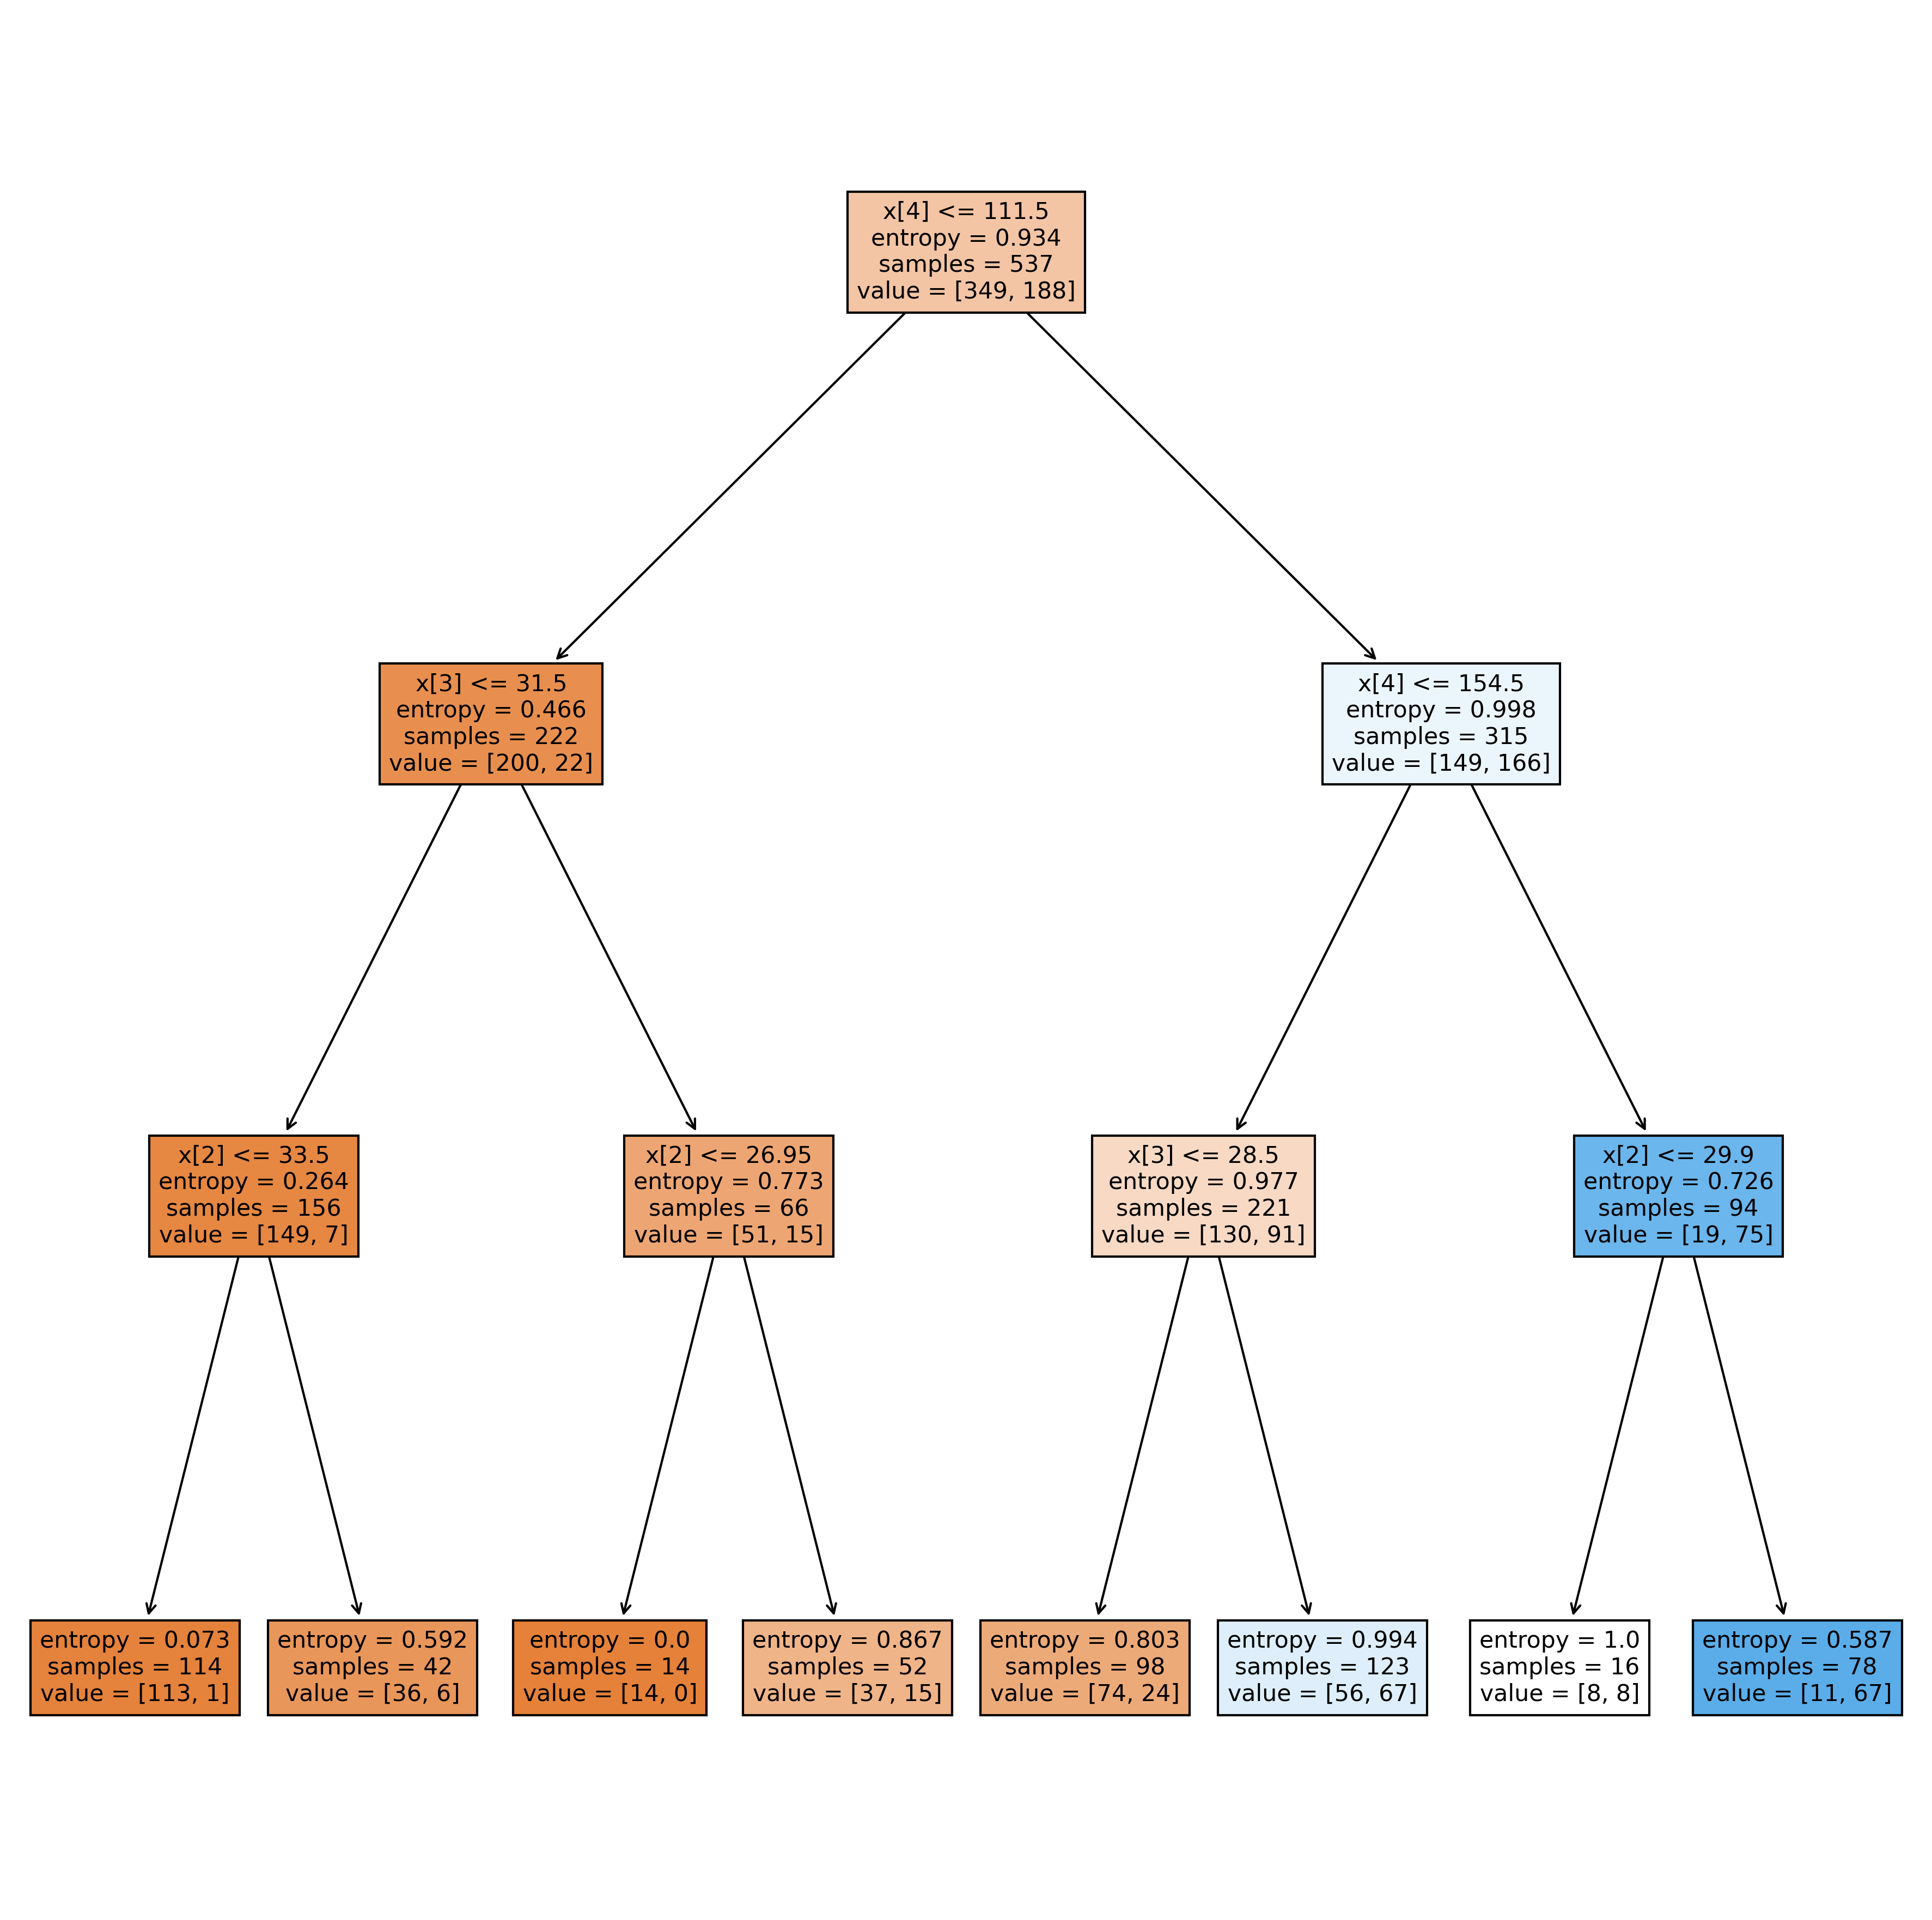

In [19]:
# Otimizando o modelo
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = pd.DataFrame(clf.predict(X_test))

# Matriz de confusão
# Linha: Real
# Coluna: Predito
print(confusion_matrix(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))

# Visualização da árvore gerada.
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=300)
tree.plot_tree(clf, filled=True)
fig.savefig('tree_sklearn_2.png')